In [1]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [2]:
df_idle = pd.read_csv('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/61705025 Test Data.txt', sep='\t', header=0)

<IPython.core.display.Javascript object>


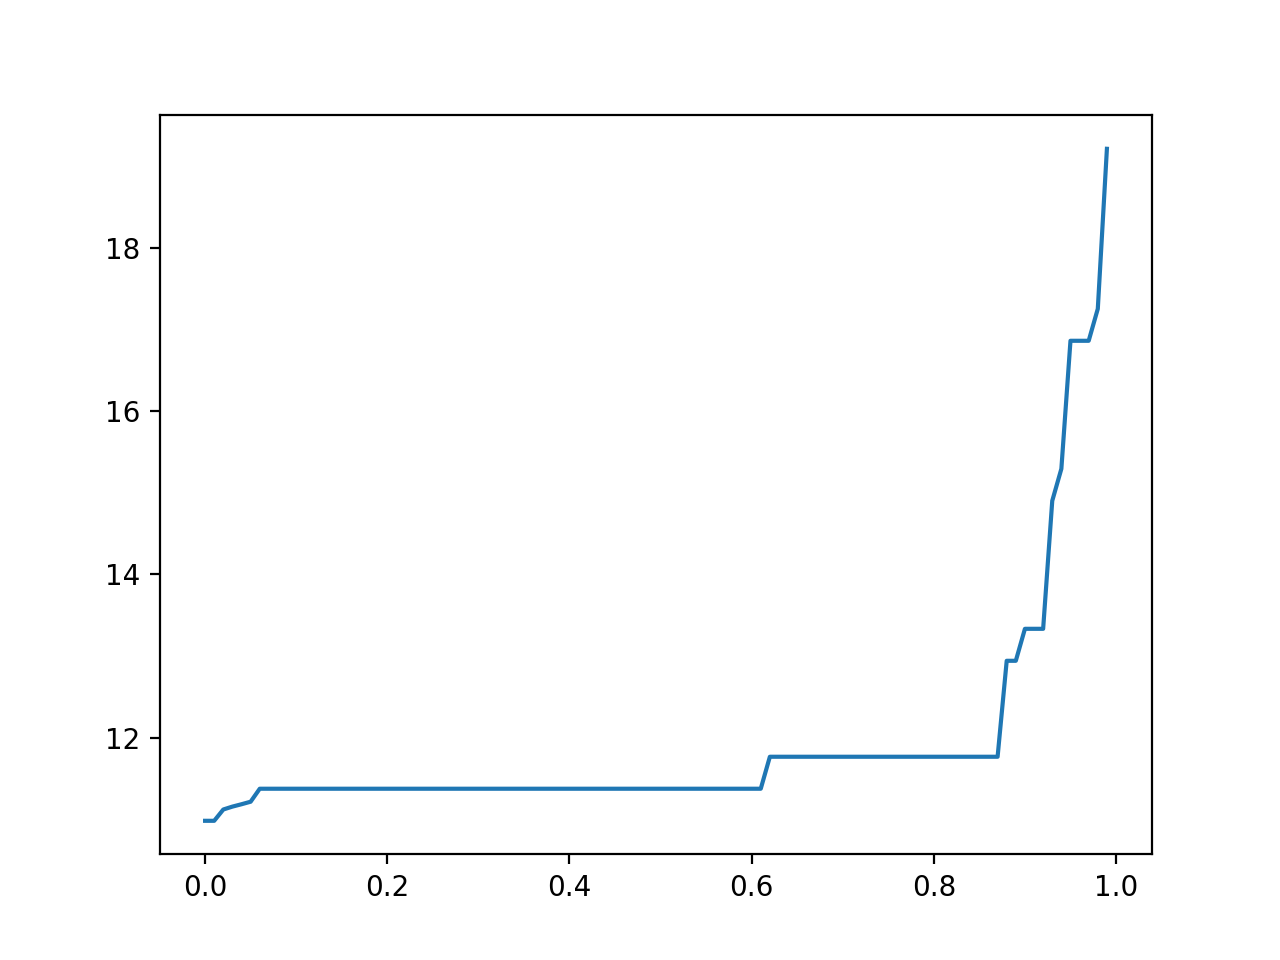

In [3]:
fig, ax = plt.subplots()

ax.plot(np.arange(0, 1, 0.01), df_idle['Eng_throttle_position_PCM[per]'].quantile(np.arange(0, 1, 0.01)))

In [4]:
idle_throttle_level = df_idle['Eng_throttle_position_PCM[per]'].quantile(0.85)

In [5]:
dfs = [
    pd.read_csv('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/61705027 Test Data.txt', sep='\t', header=0),
    pd.read_csv('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/61705028 Test Data.txt', sep='\t', header=0),
    pd.read_csv('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/61706053 Test Data.txt', sep='\t', header=0),
    pd.read_csv('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/61706054 Test Data.txt', sep='\t', header=0),
    pd.read_csv('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/61706055 Test Data.txt', sep='\t', header=0)
]

df = pd.concat(dfs, sort=False)

In [6]:
ped_vs_rpm_df = dfs[0]

ped_vs_rpm_df = ped_vs_rpm_df[(ped_vs_rpm_df['Trans_shift_inprogress_CAN[]'] == 0.0)
                              & (ped_vs_rpm_df['Eng_throttle_position_PCM[per]'] > idle_throttle_level)]

ped_vs_rpm_df = ped_vs_rpm_df[['Trans_gear_engaged_CAN[]', 
                               'Pedal_accel_pos_CAN[per]', 
                               'Eng_speed_PCM[rpm]']]

In [7]:
ped_vs_rpm_models = []
poly_transforms = []

for gear in range(1, 10 + 1):
    
    ped_vs_rpm_gear_df = ped_vs_rpm_df[ped_vs_rpm_df['Trans_gear_engaged_CAN[]'] == gear]
    
    poly_transforms.append(PolynomialFeatures(3))
    
    X = poly_transforms[-1].fit_transform(ped_vs_rpm_gear_df['Pedal_accel_pos_CAN[per]'].values.reshape(-1, 1))
    Y = ped_vs_rpm_gear_df['Eng_speed_PCM[rpm]']
    
    ols = linear_model.LinearRegression()    
    ped_vs_rpm_models.append(ols.fit(X, Y))

<IPython.core.display.Javascript object>


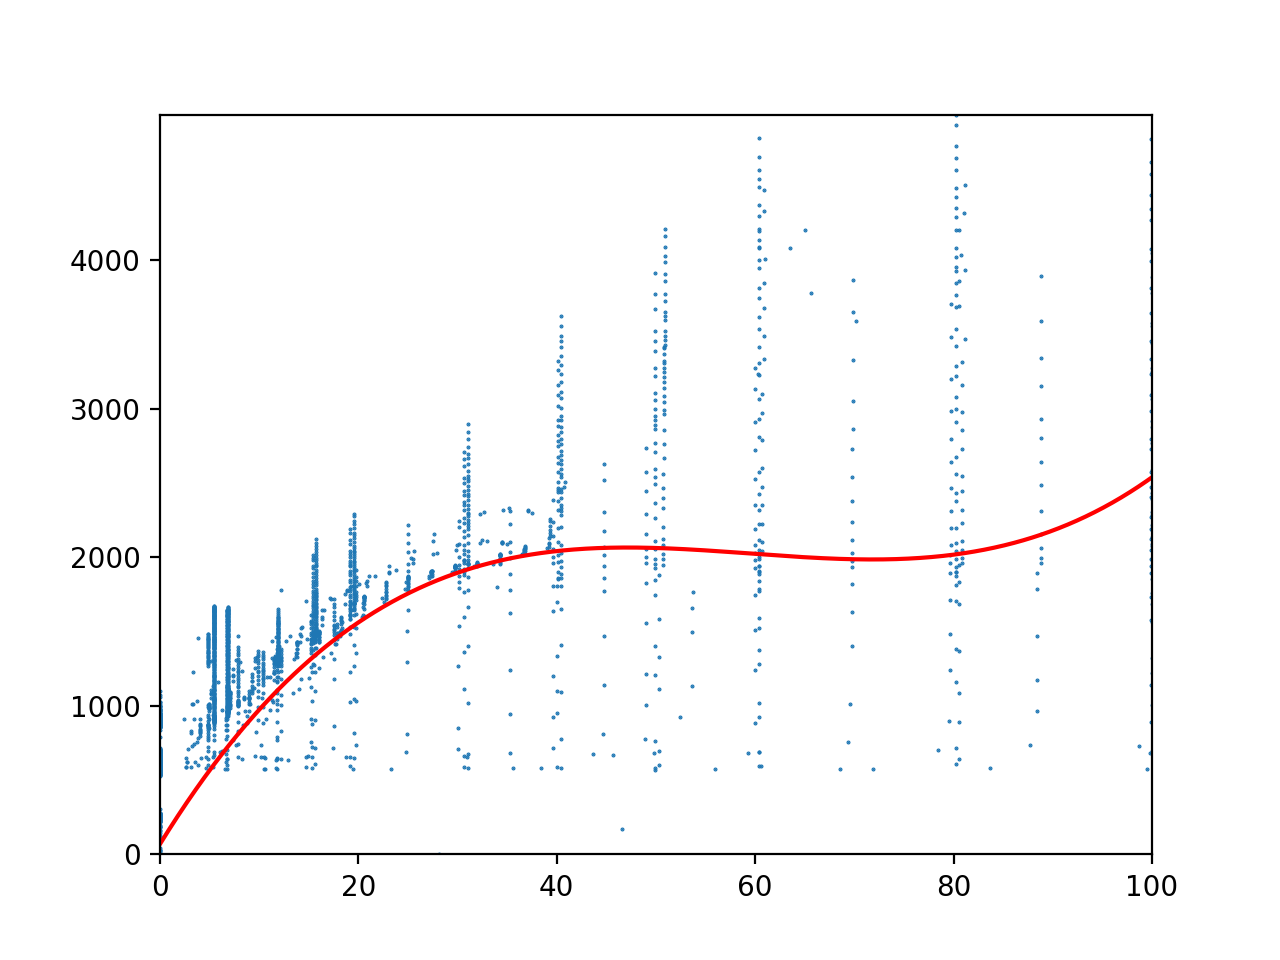

<IPython.core.display.Javascript object>


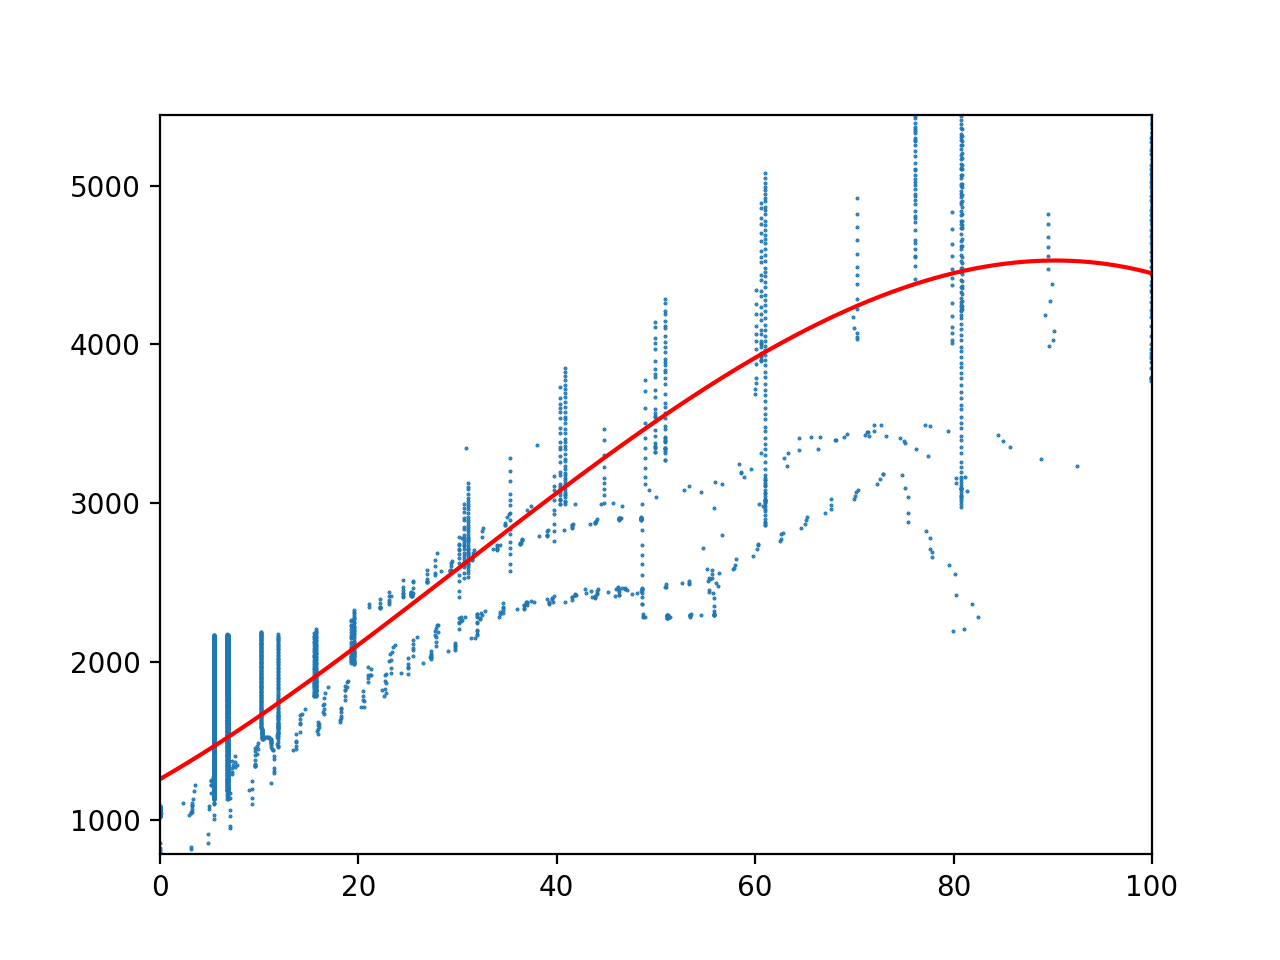

<IPython.core.display.Javascript object>


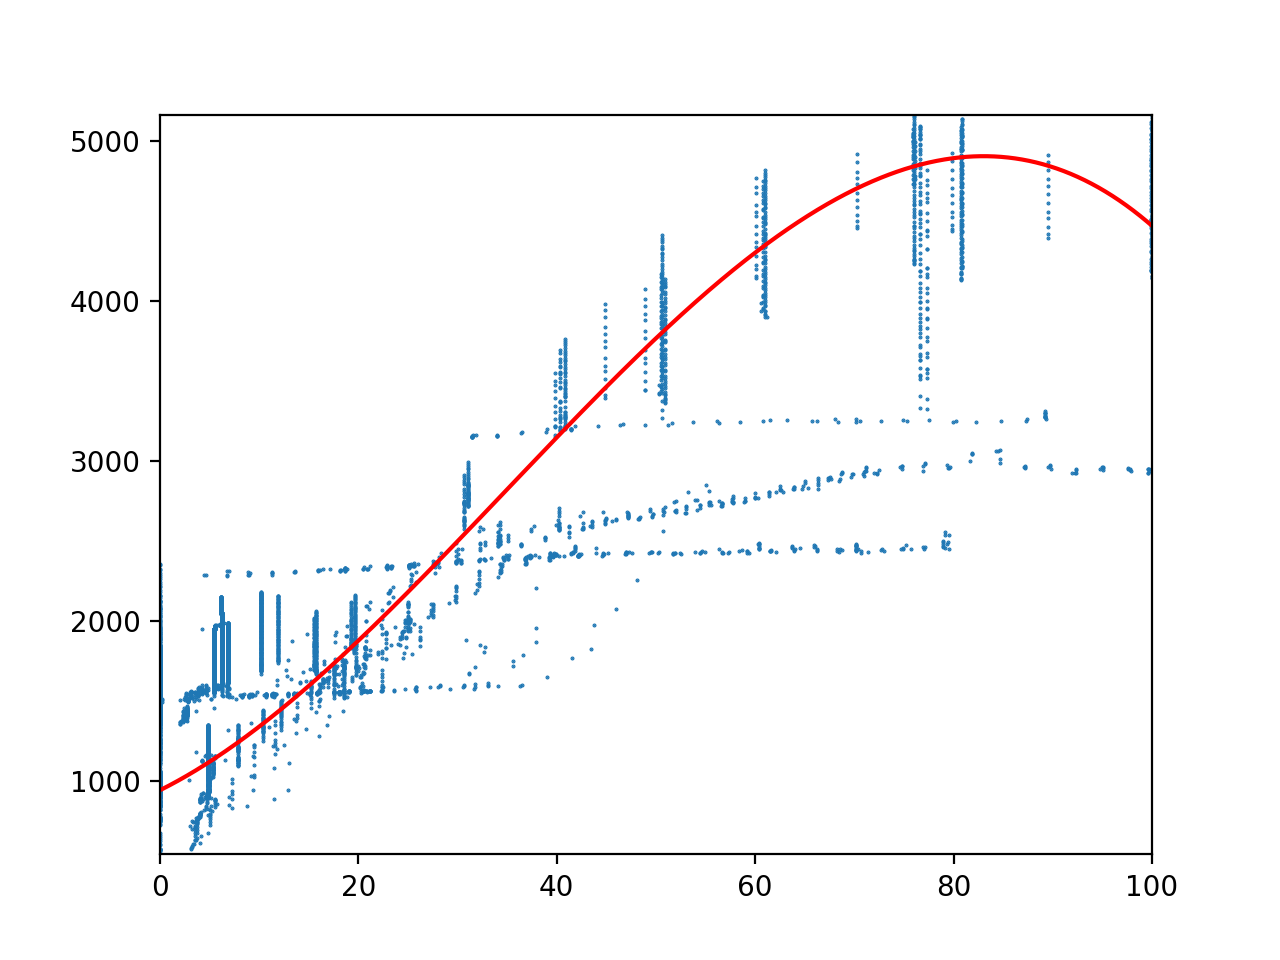

<IPython.core.display.Javascript object>


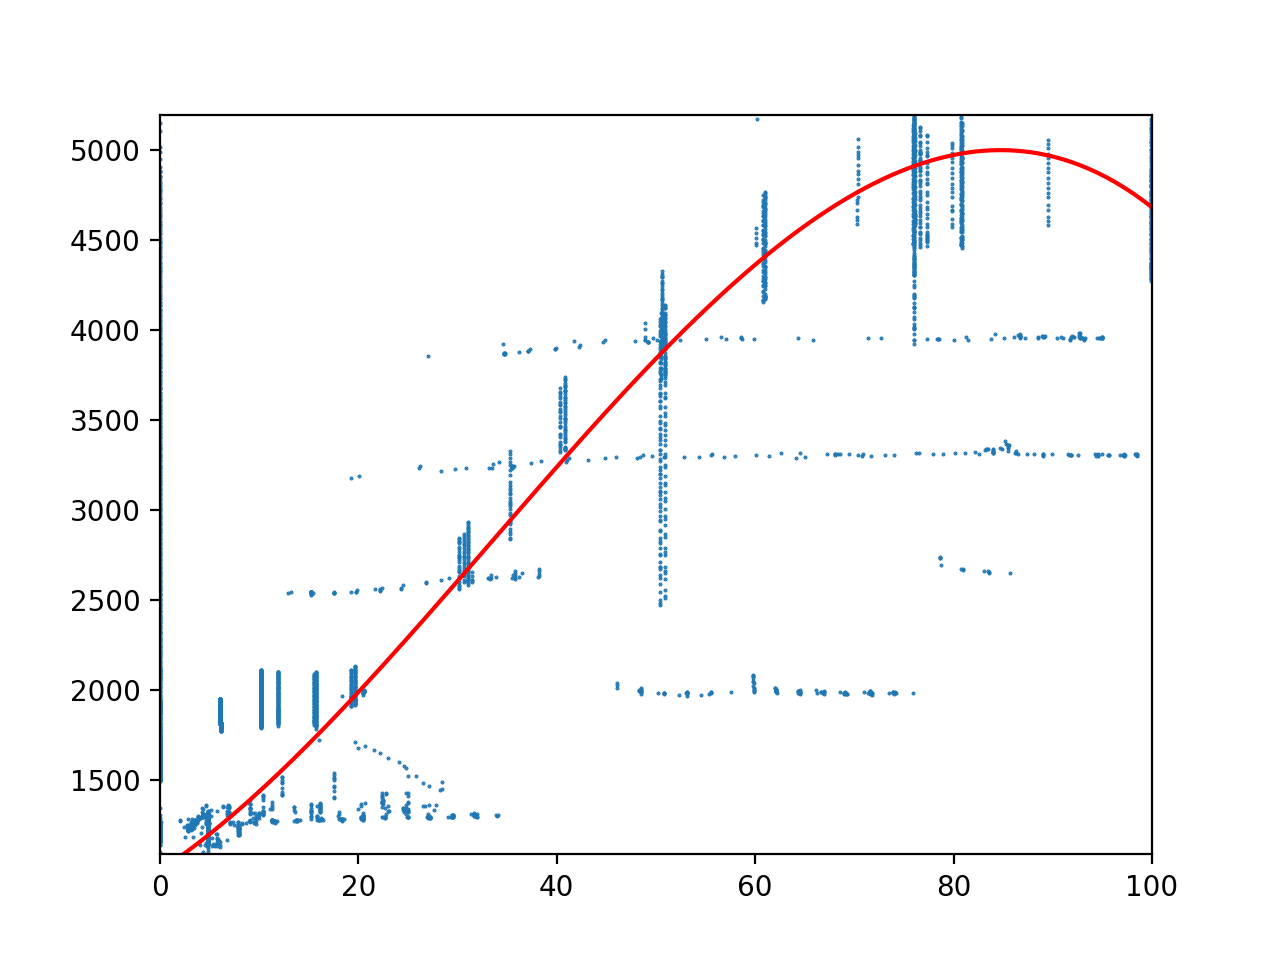

<IPython.core.display.Javascript object>


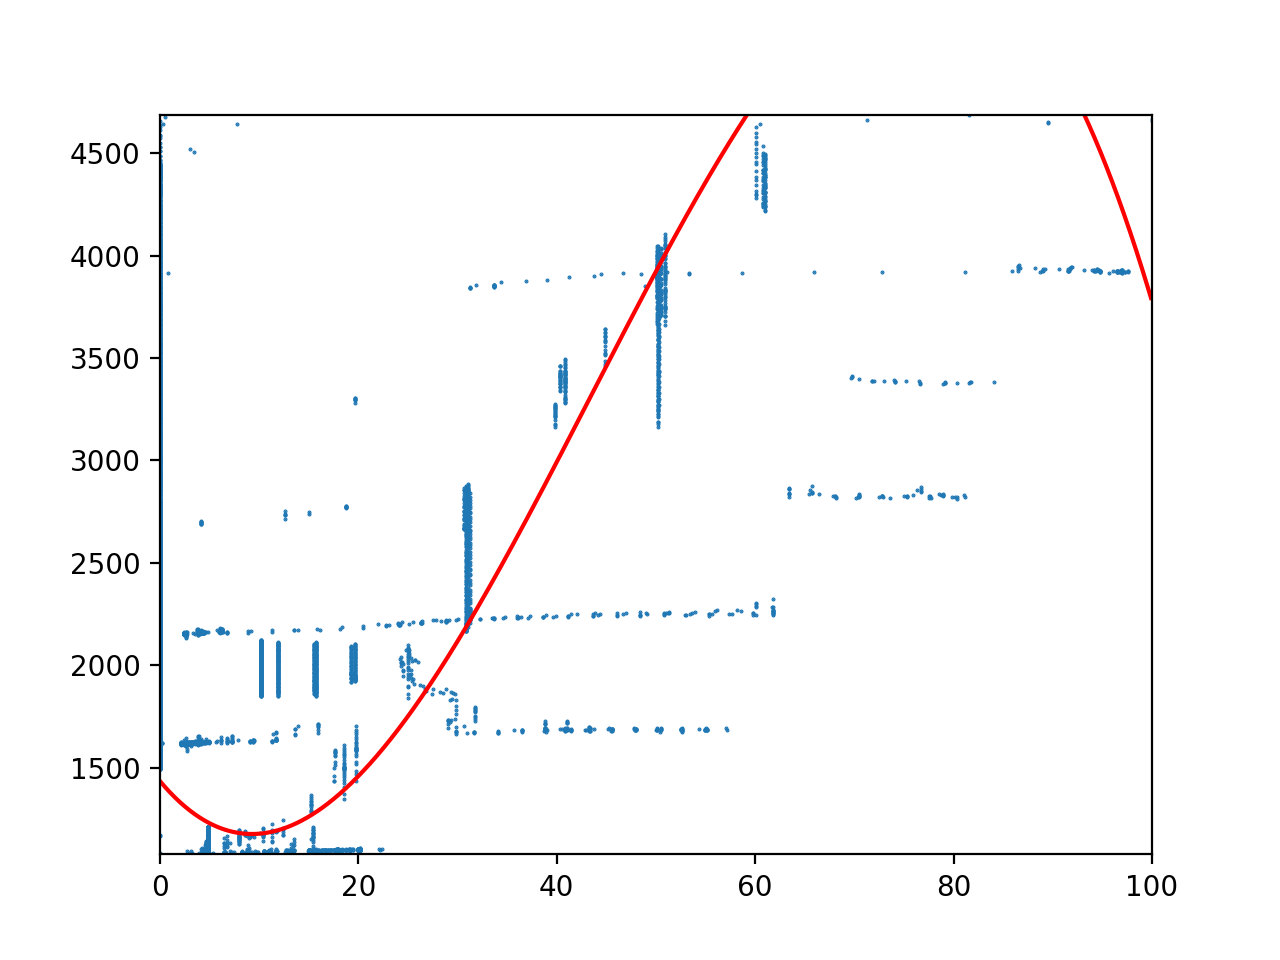

<IPython.core.display.Javascript object>


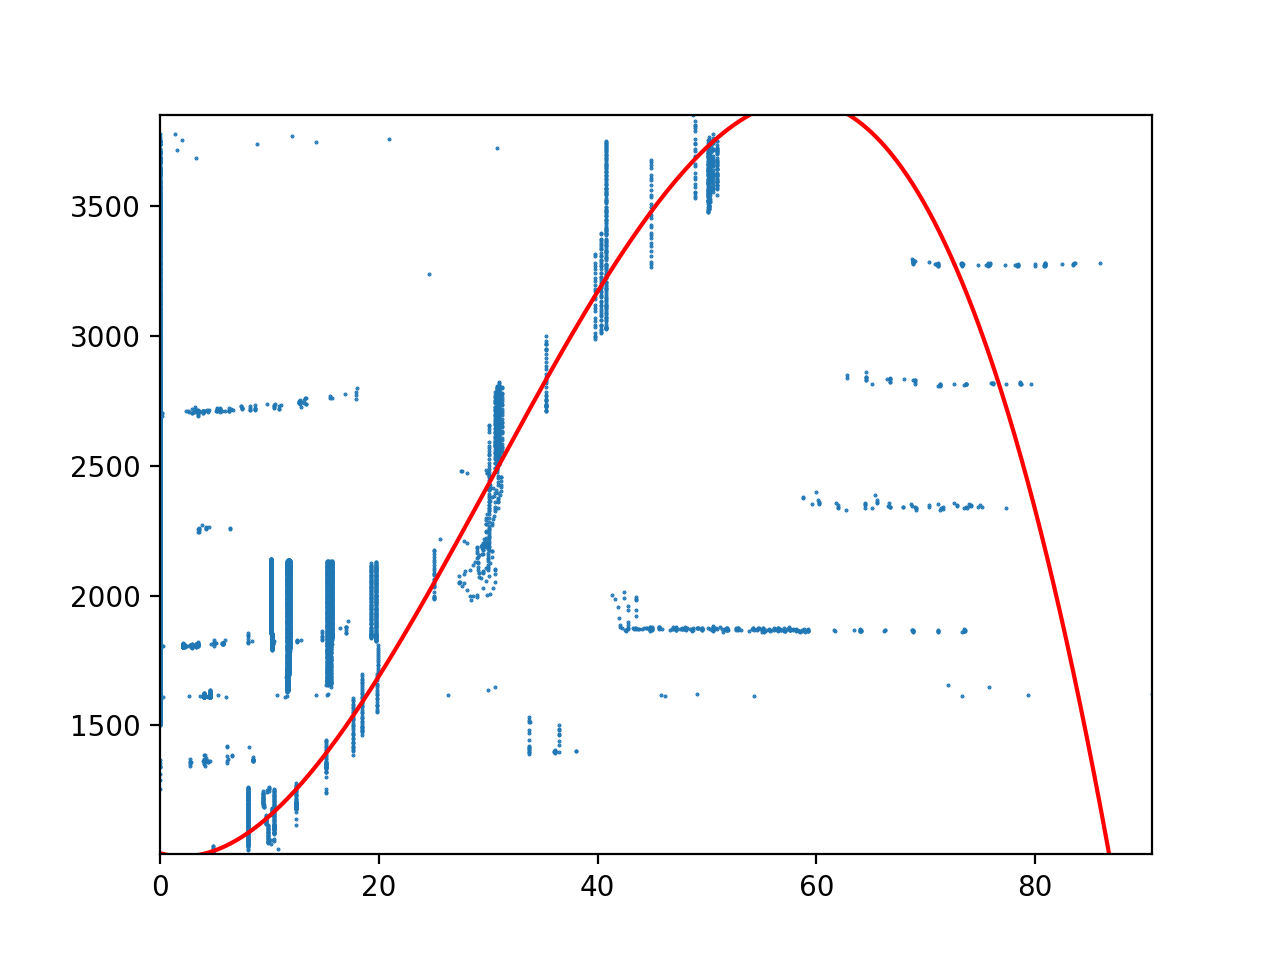

<IPython.core.display.Javascript object>


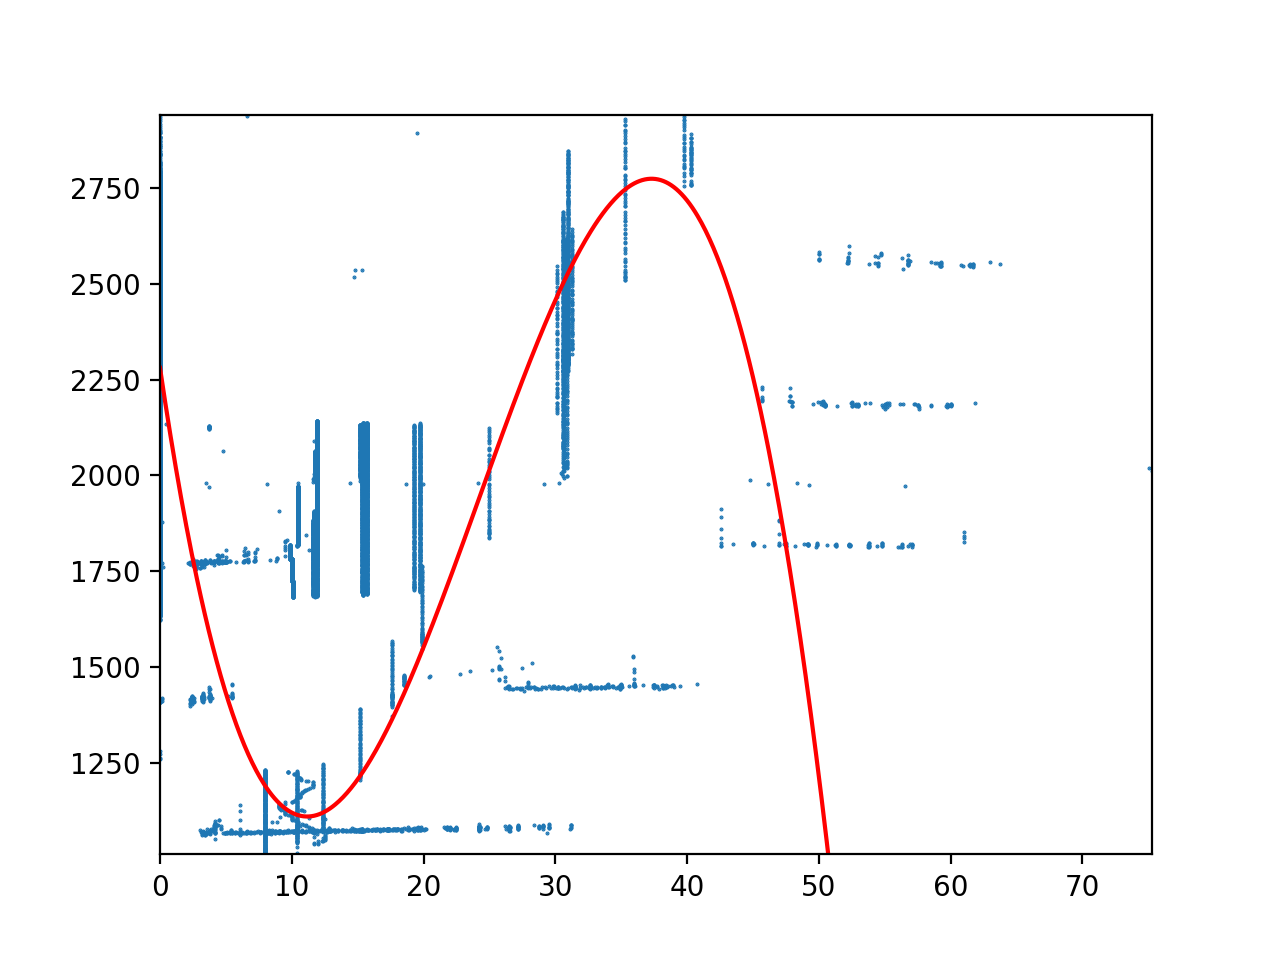

<IPython.core.display.Javascript object>


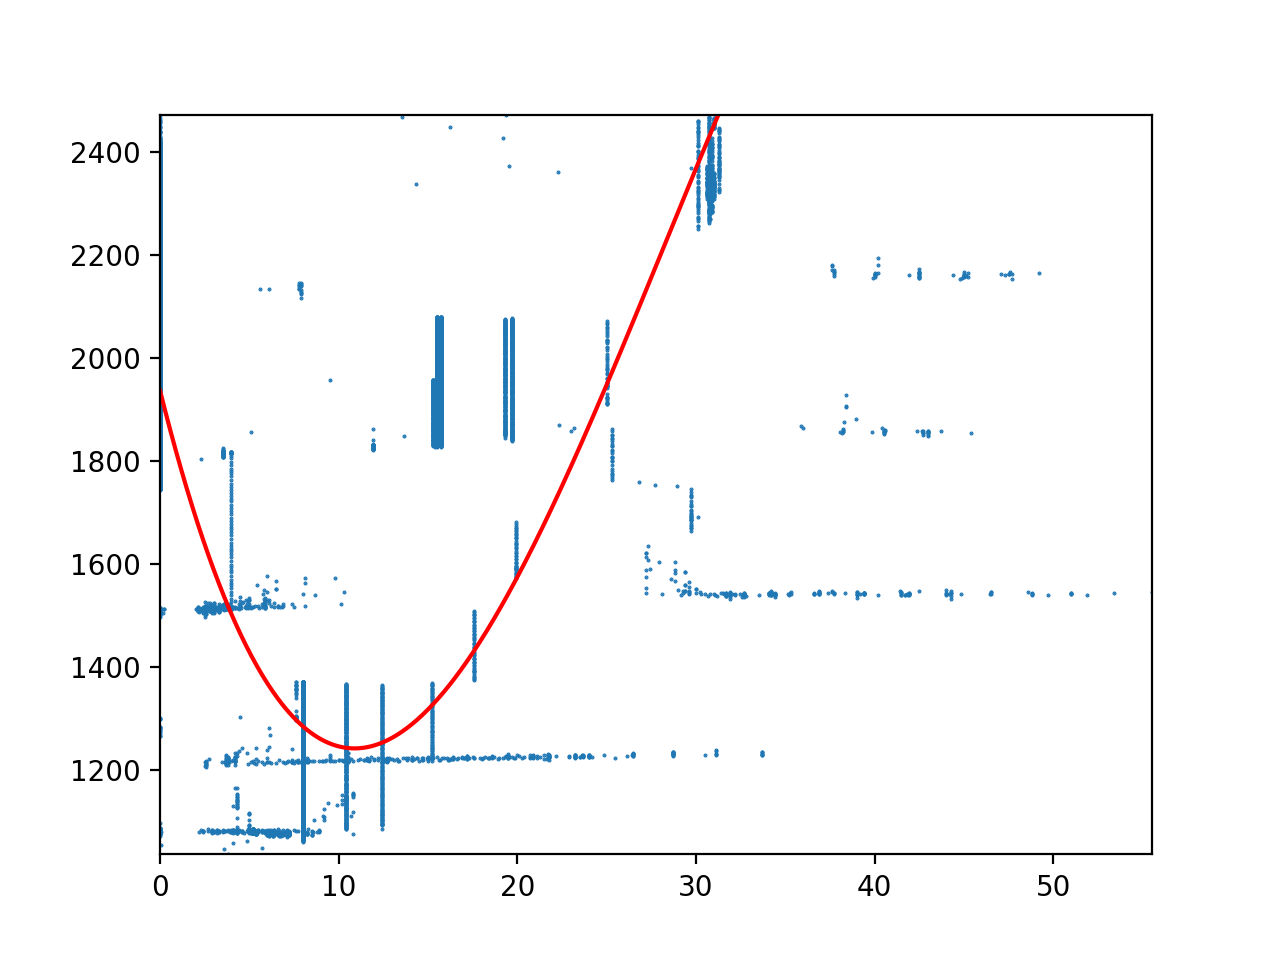

<IPython.core.display.Javascript object>


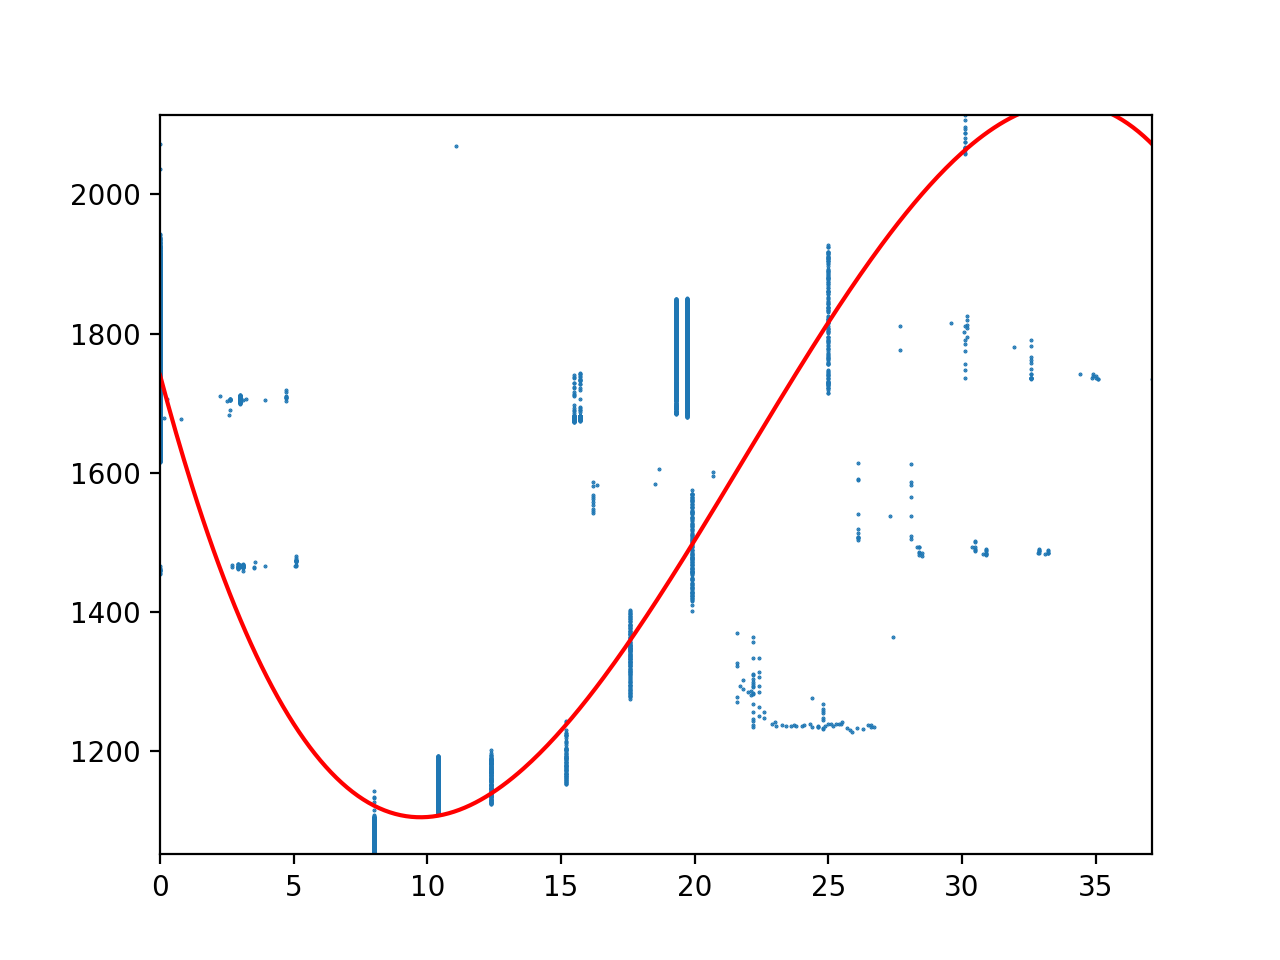

<IPython.core.display.Javascript object>


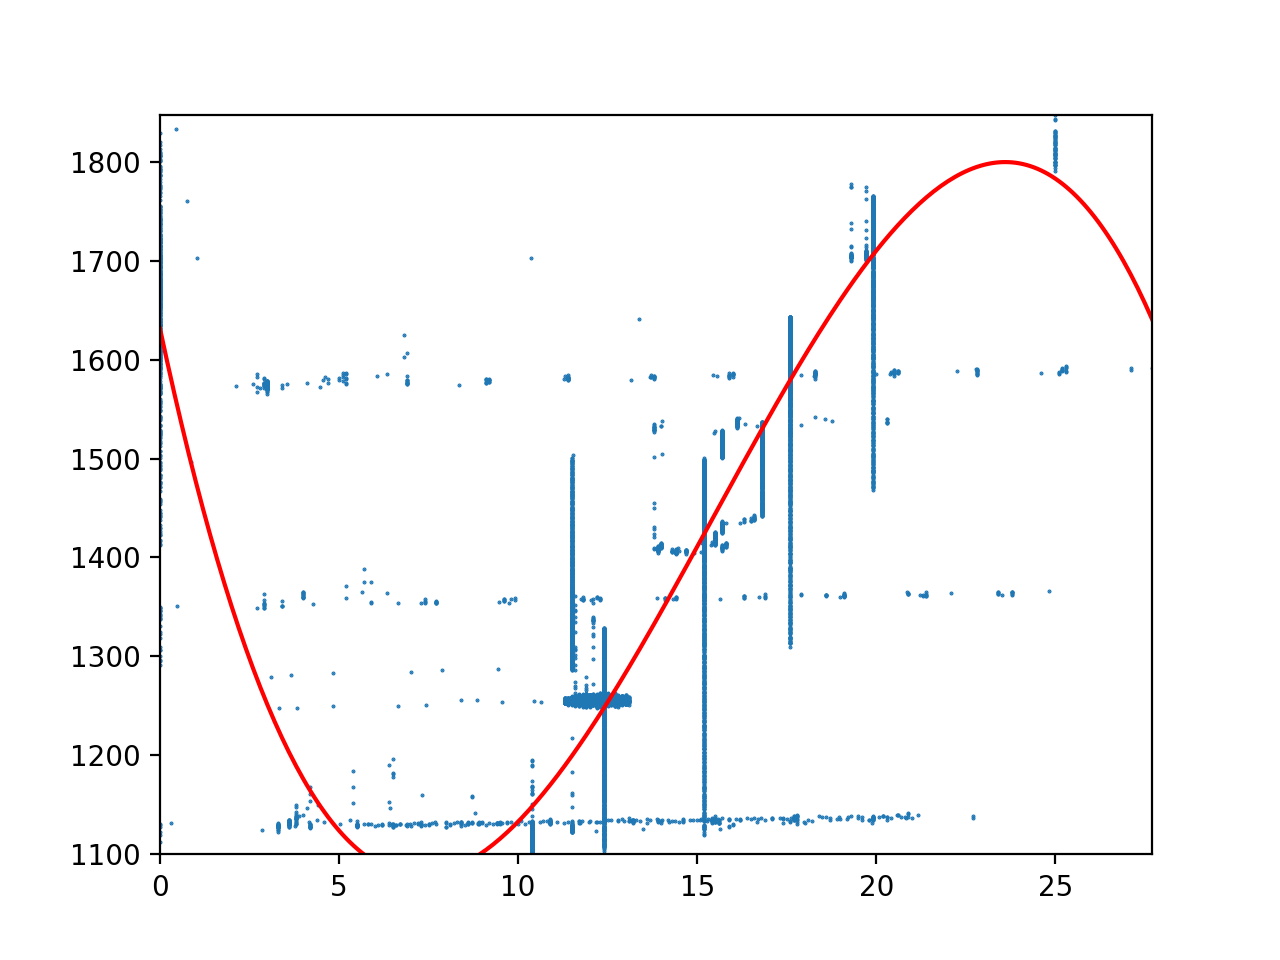

In [10]:
for gear, (ols, poly_transform) in enumerate(zip(ped_vs_rpm_models, poly_transforms)):
    
    _, ax = plt.subplots()
    
    X = np.arange(0, 100, 0.1)
    Y = ols.predict(poly_transform.transform(X.reshape(-1, 1)))
    
    ax.plot(X, Y, color='red')
    
    df_gear = df[(df['Trans_shift_inprogress_CAN[]'] == 0.0)
                 & (df['Eng_throttle_position_PCM[per]'] > idle_throttle_level)
                 & (df['Trans_gear_engaged_CAN[]'] == gear + 1)]
    
    ax.scatter(df_gear['Pedal_accel_pos_CAN[per]'],
               df_gear['Eng_speed_PCM[rpm]'], s=0.2)
    
    ax.set_xlim(df_gear['Pedal_accel_pos_CAN[per]'].min(), df_gear['Pedal_accel_pos_CAN[per]'].max())
    ax.set_ylim(df_gear['Eng_speed_PCM[rpm]'].min(), df_gear['Eng_speed_PCM[rpm]'].max())

In [11]:
rpm_vs_spd_df = dfs[0]

rpm_vs_spd_df = rpm_vs_spd_df[(rpm_vs_spd_df['Trans_shift_inprogress_CAN[]'] == 0.0)
                              & (rpm_vs_spd_df['Eng_throttle_position_PCM[per]'] > idle_throttle_level)]

rpm_vs_spd_df = rpm_vs_spd_df[['Trans_gear_engaged_CAN[]',
                               'Eng_speed_PCM[rpm]', 
                               'Dyno_Spd[mph]']]

In [12]:
rpm_vs_spd_models = []

for gear in range(1, 10 + 1):
    
    rpm_vs_spd_gear_df = rpm_vs_spd_df[rpm_vs_spd_df['Trans_gear_engaged_CAN[]'] == gear]
        
    X = rpm_vs_spd_gear_df['Eng_speed_PCM[rpm]'].values.reshape(-1, 1)
    Y = rpm_vs_spd_gear_df['Dyno_Spd[mph]']
    
    ols = linear_model.LinearRegression()    
    rpm_vs_spd_models.append(ols.fit(X, Y))

<IPython.core.display.Javascript object>


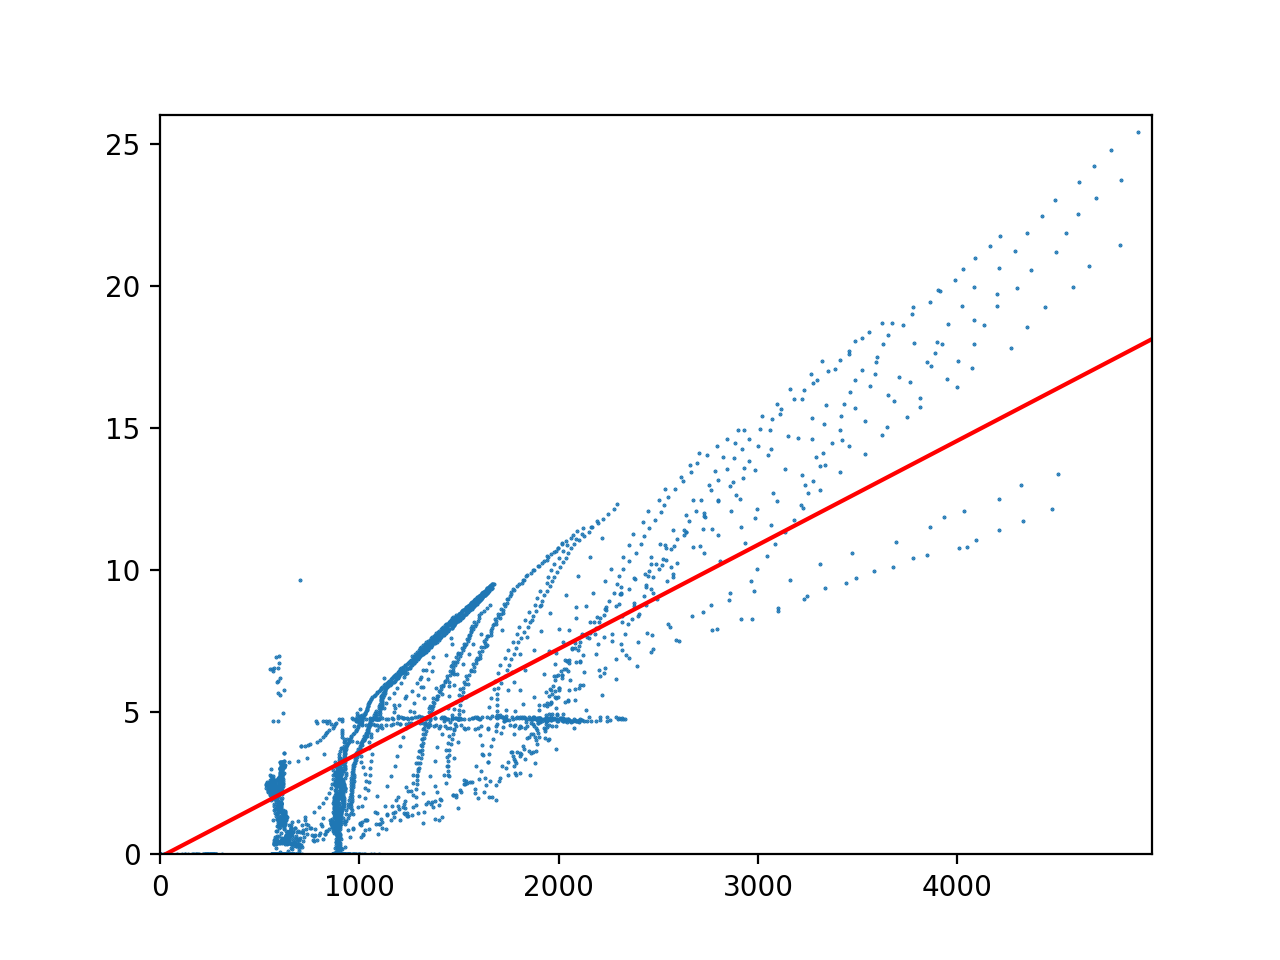

<IPython.core.display.Javascript object>


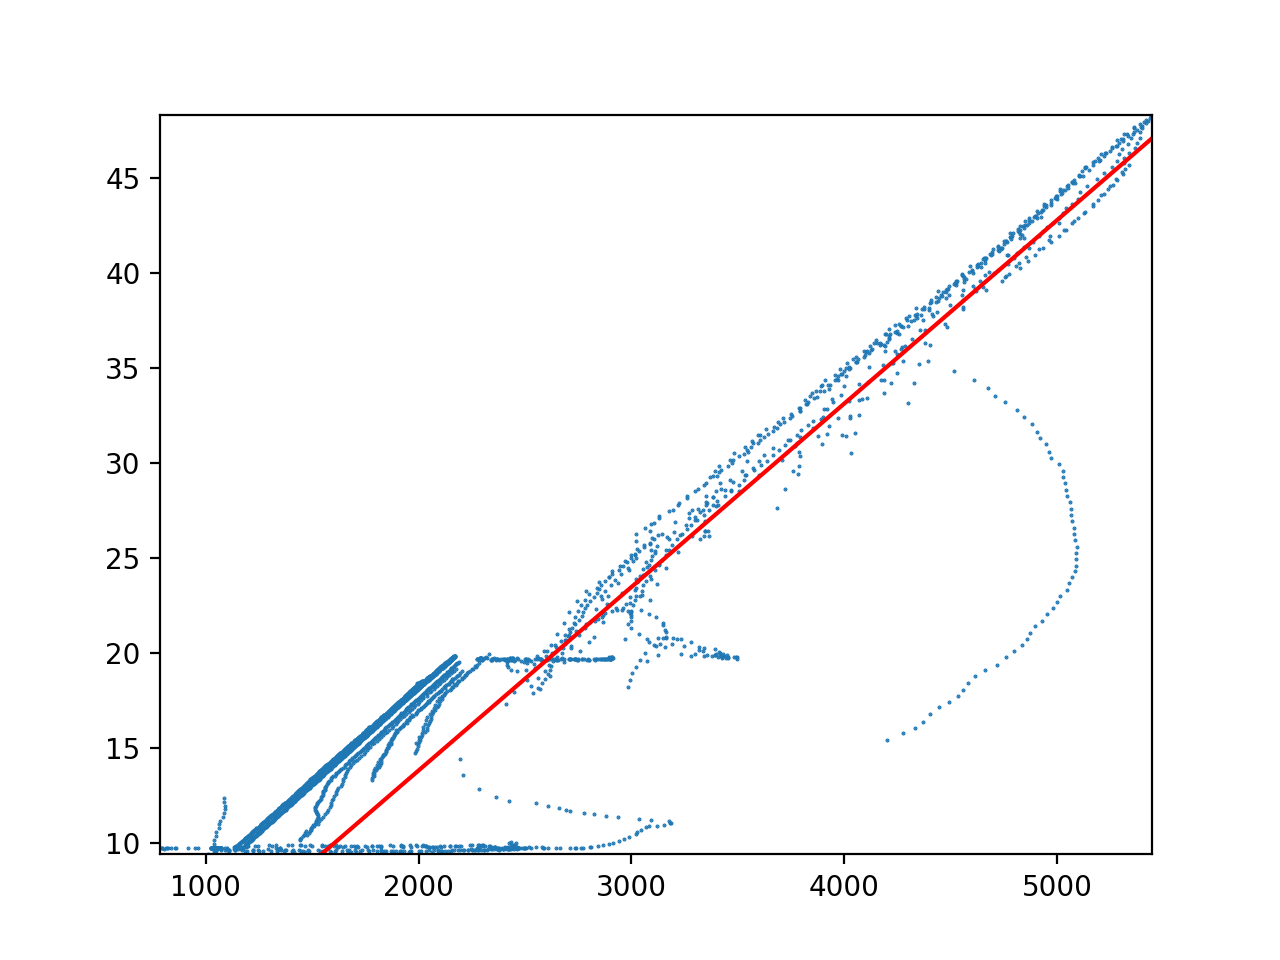

<IPython.core.display.Javascript object>


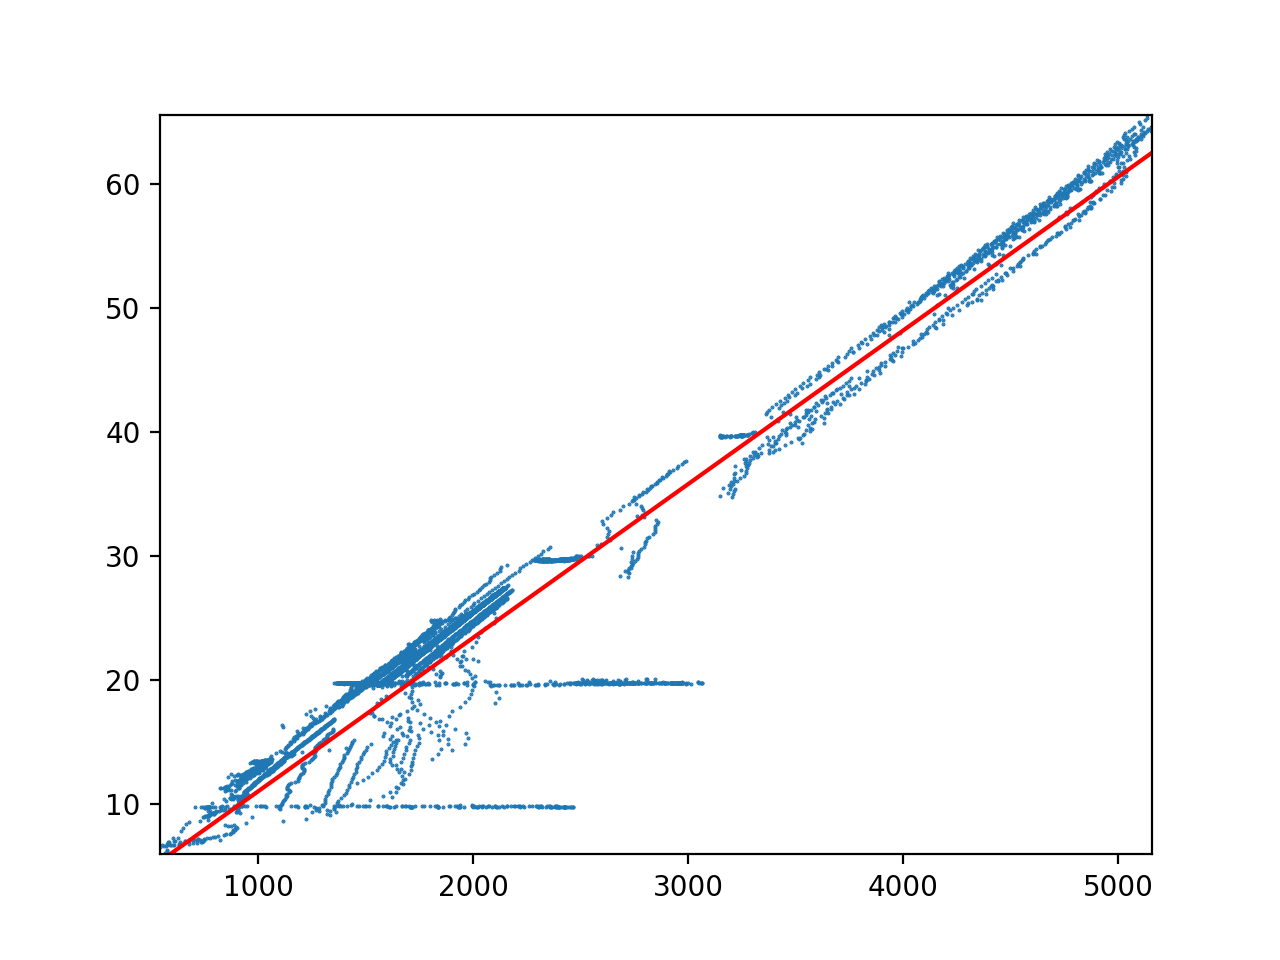

<IPython.core.display.Javascript object>


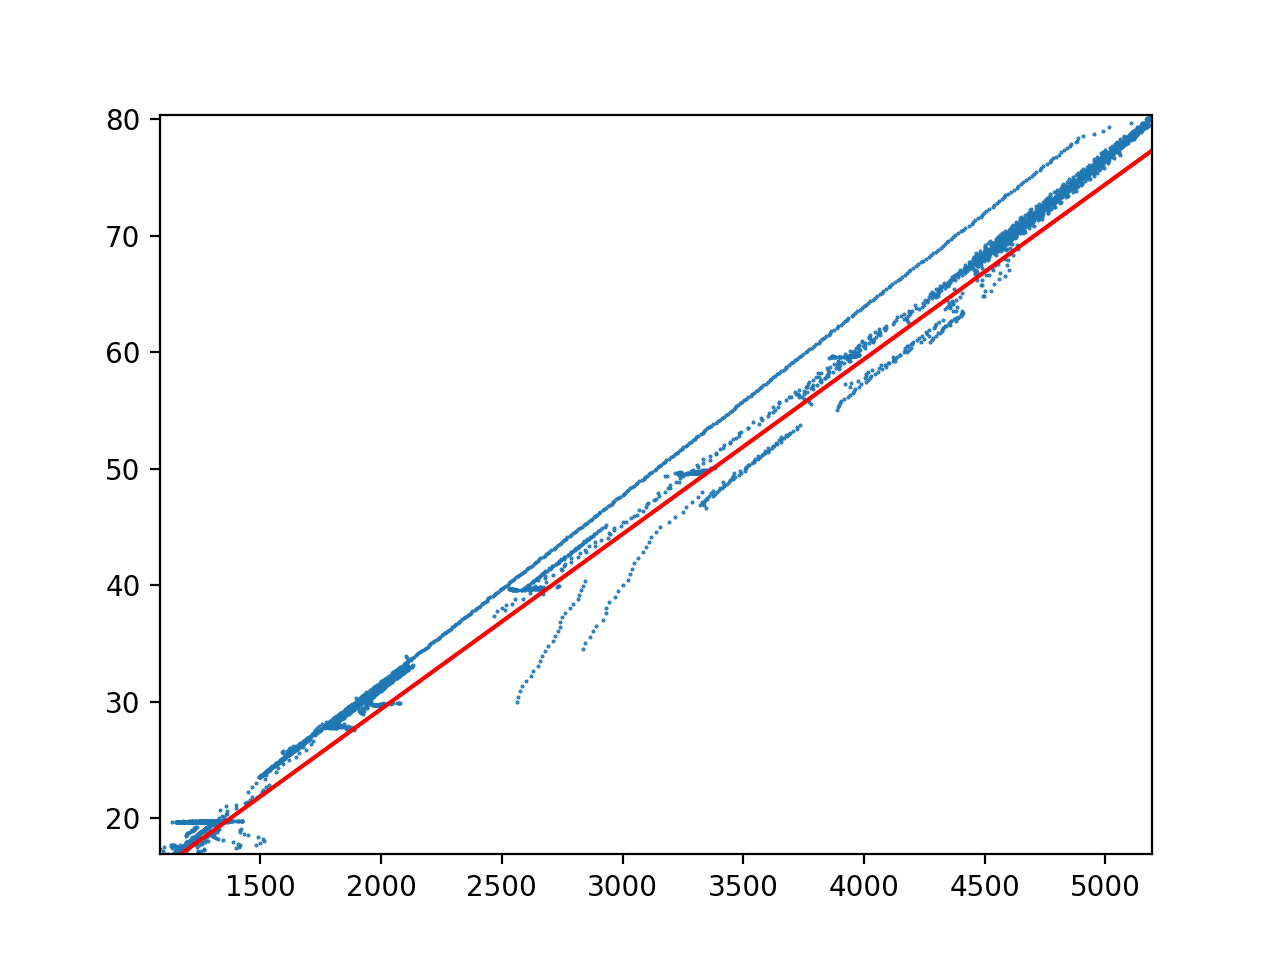

<IPython.core.display.Javascript object>


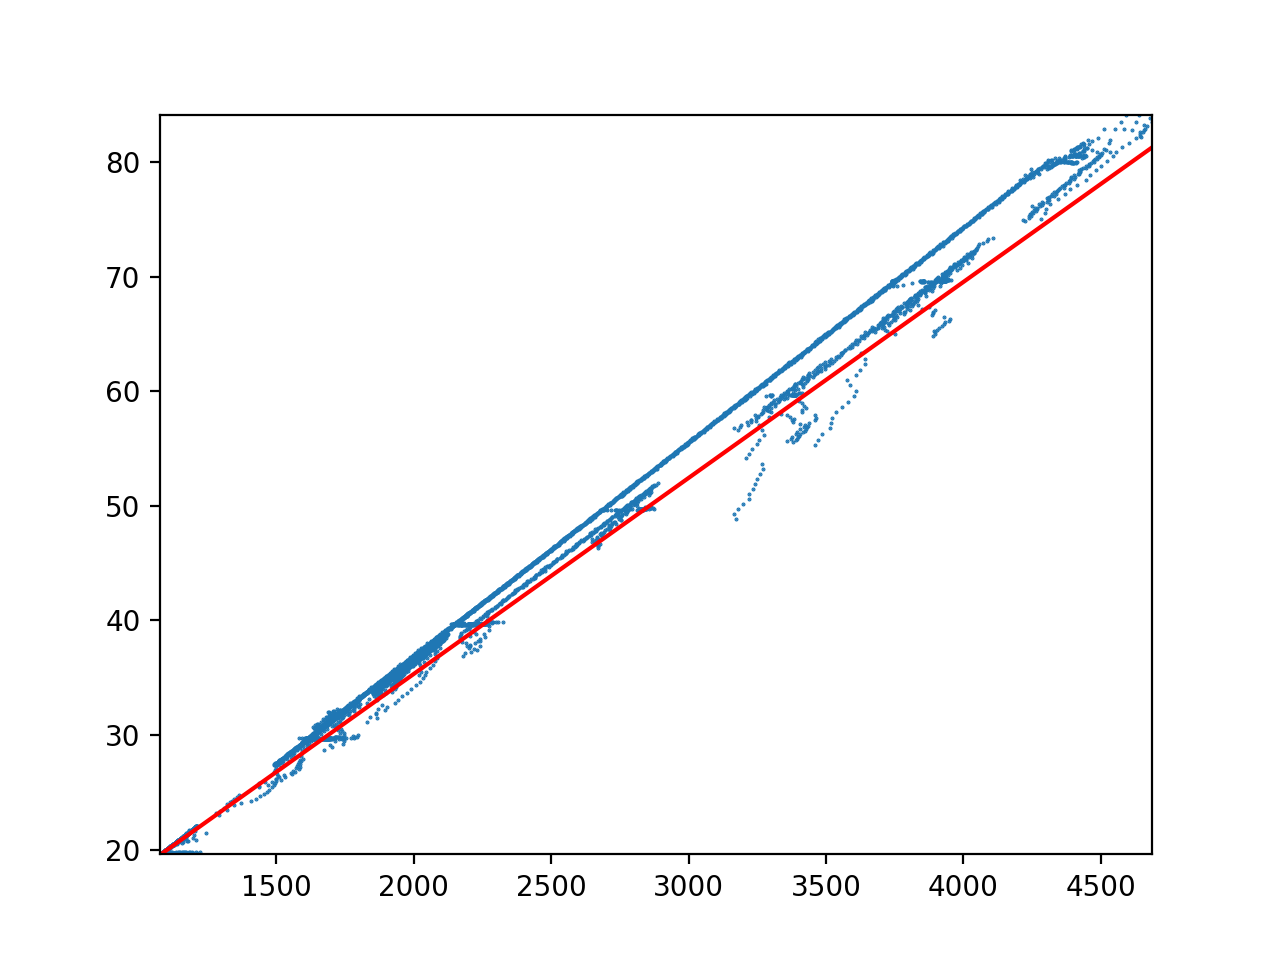

<IPython.core.display.Javascript object>


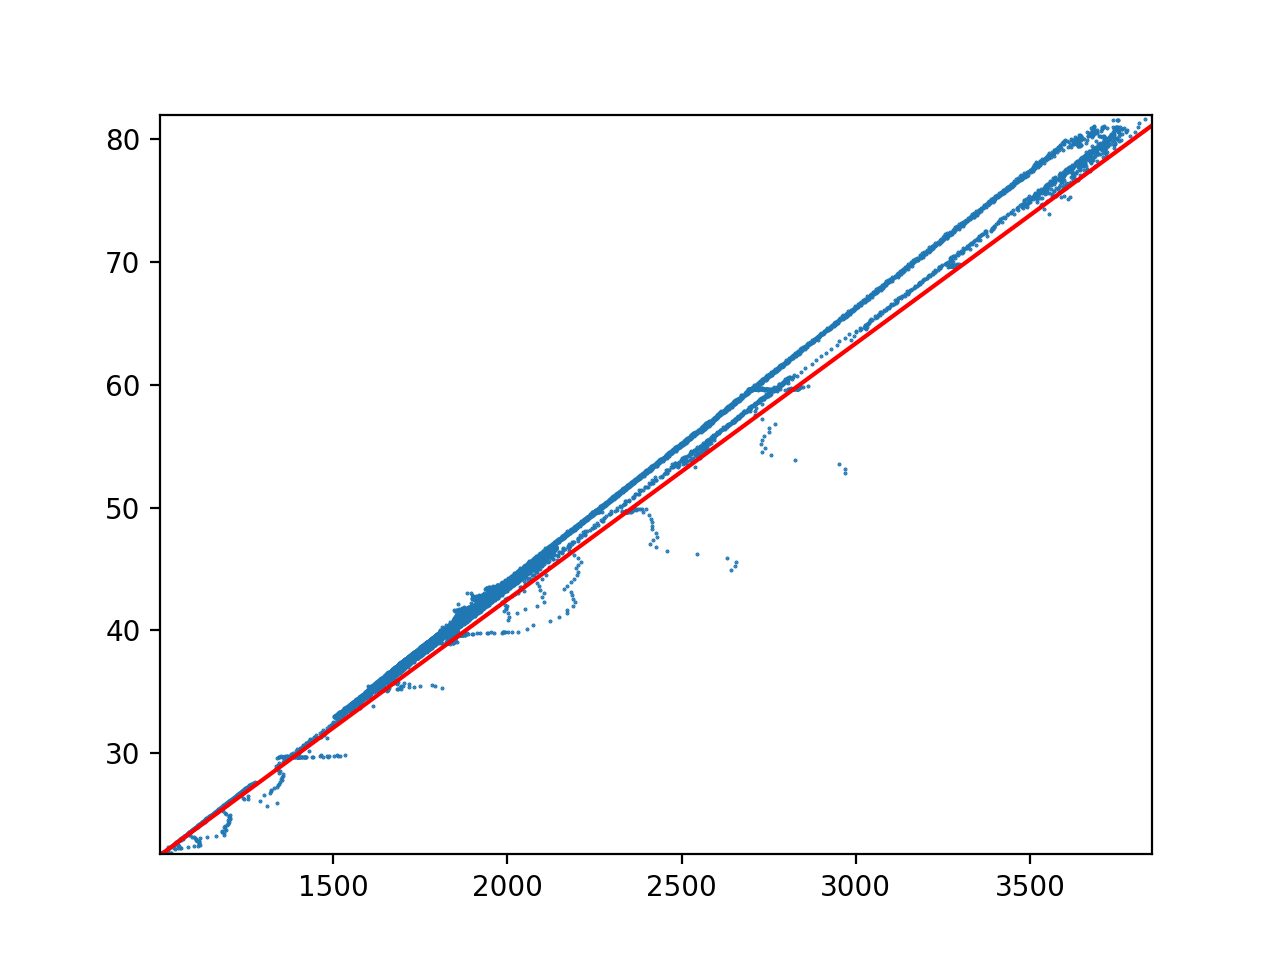

<IPython.core.display.Javascript object>


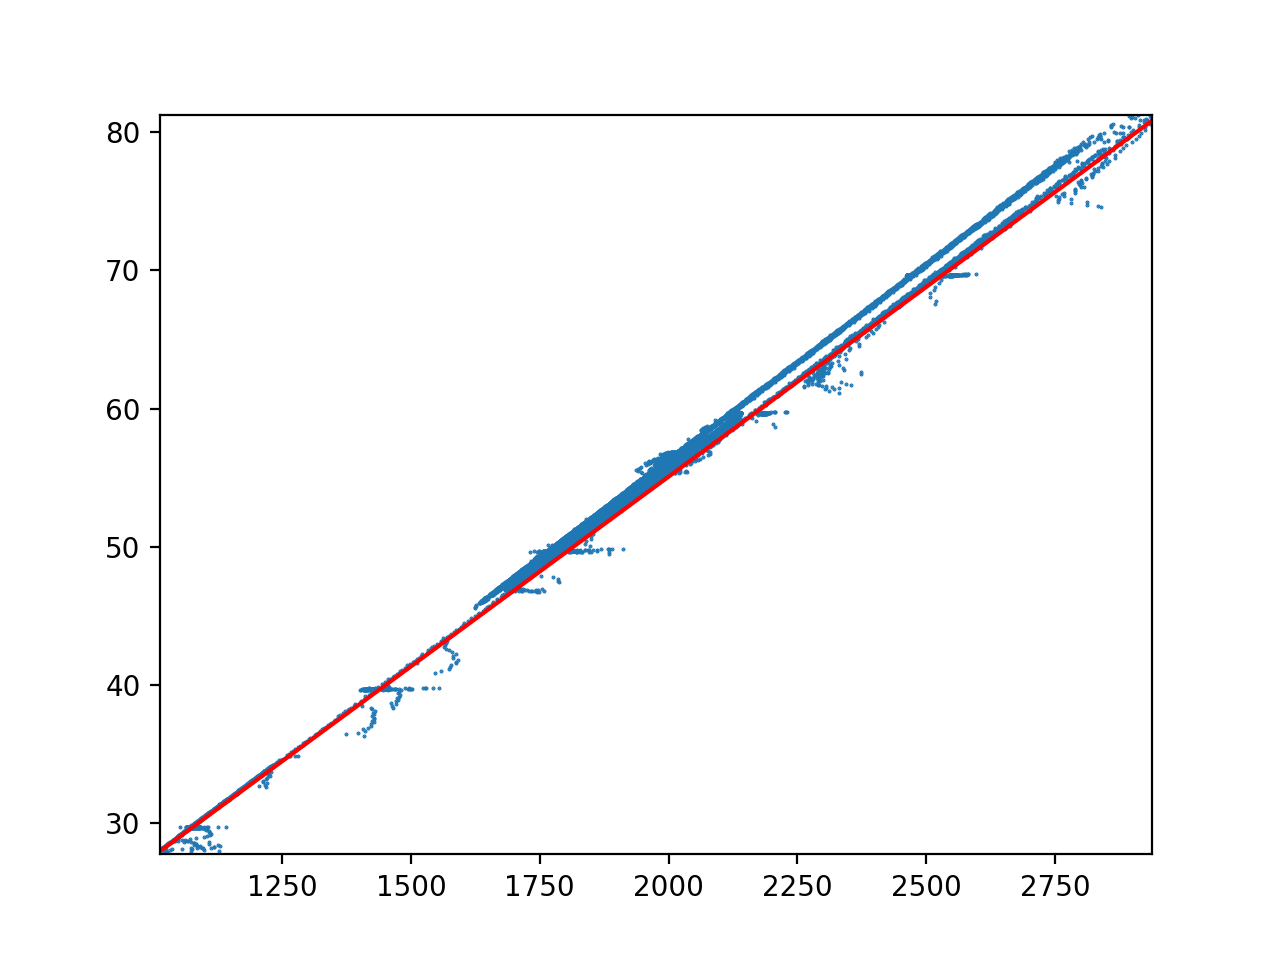

<IPython.core.display.Javascript object>


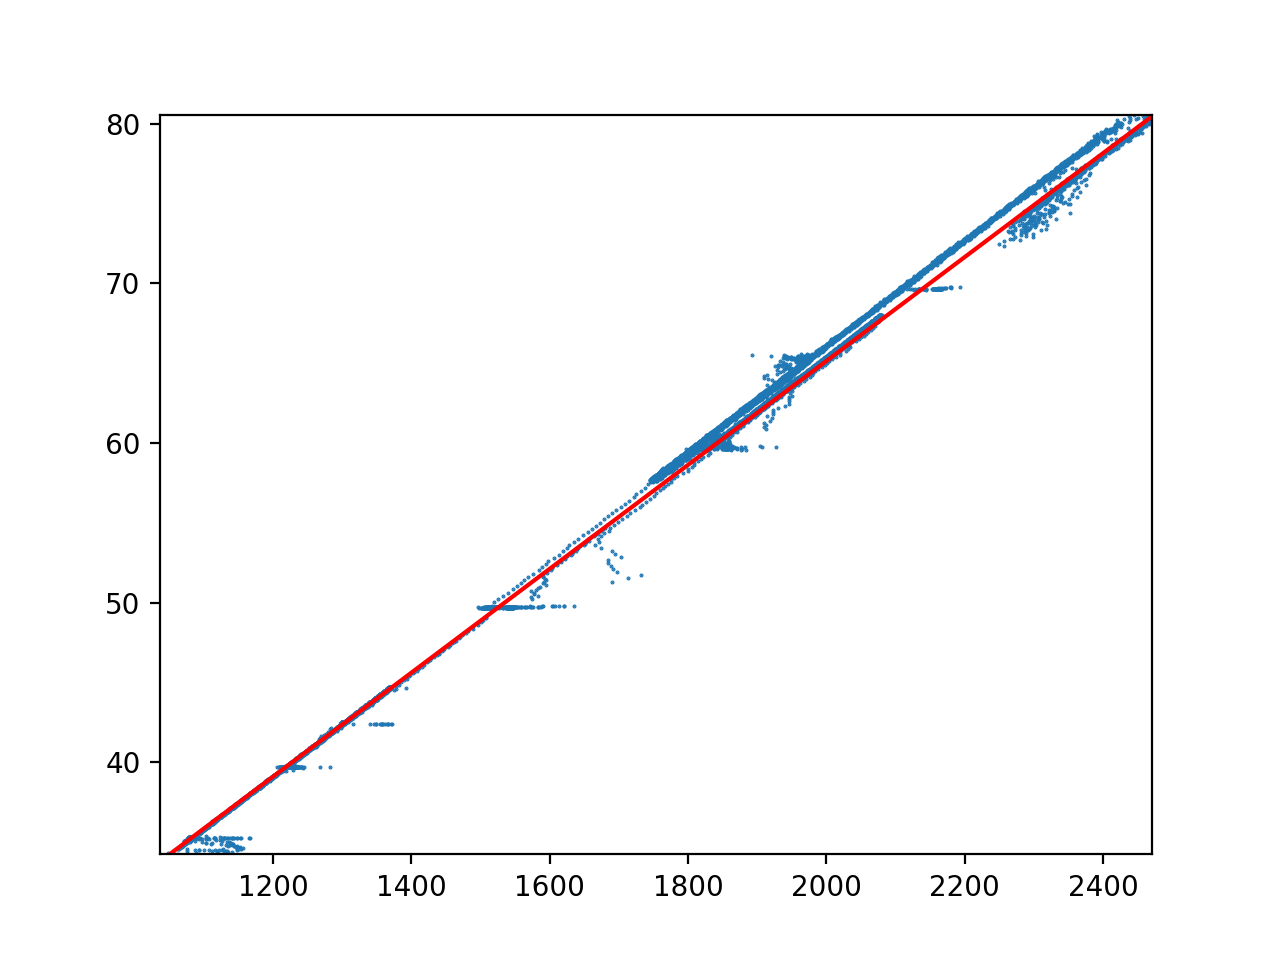

<IPython.core.display.Javascript object>


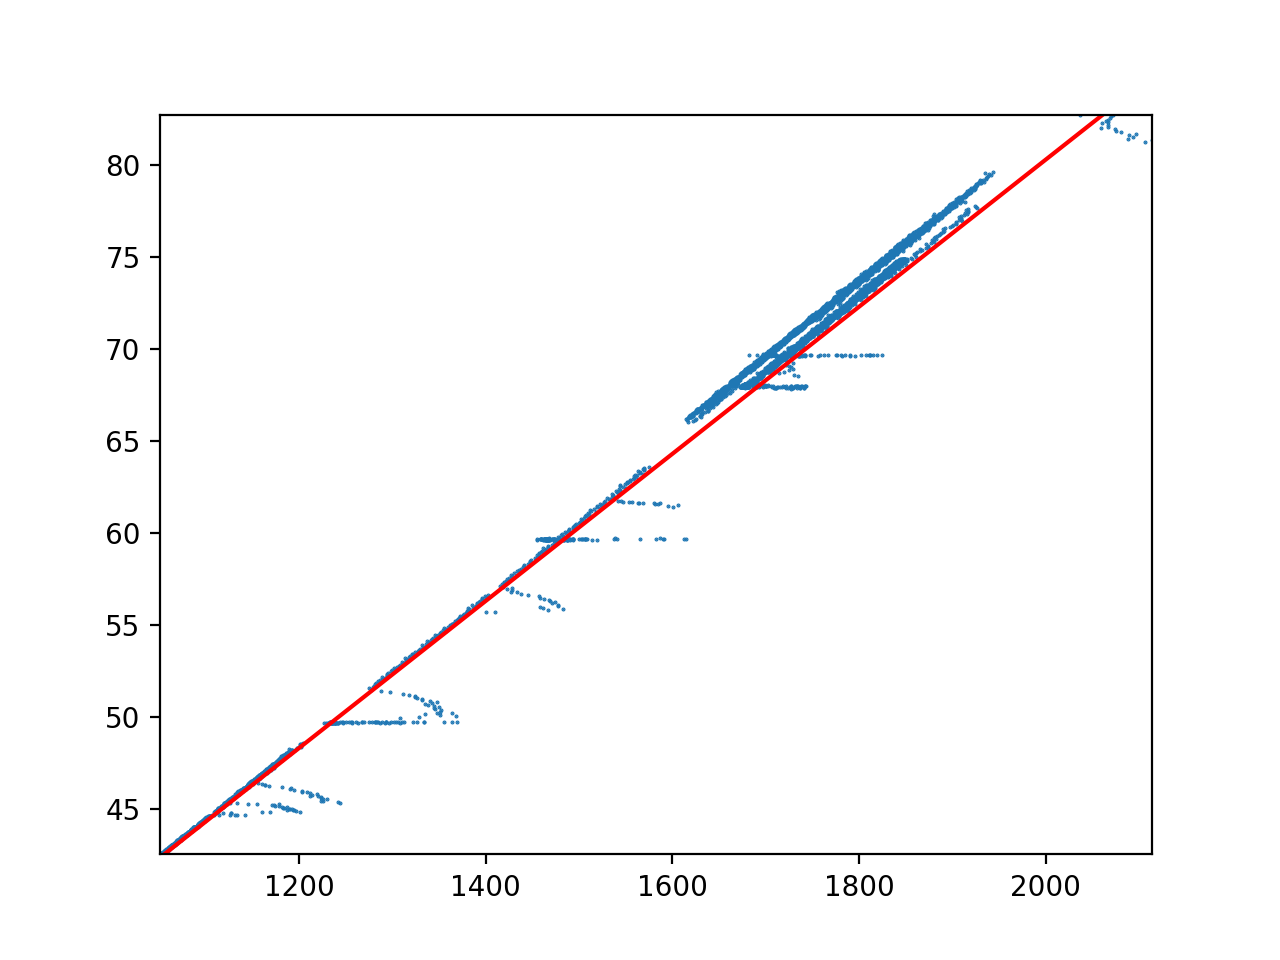

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


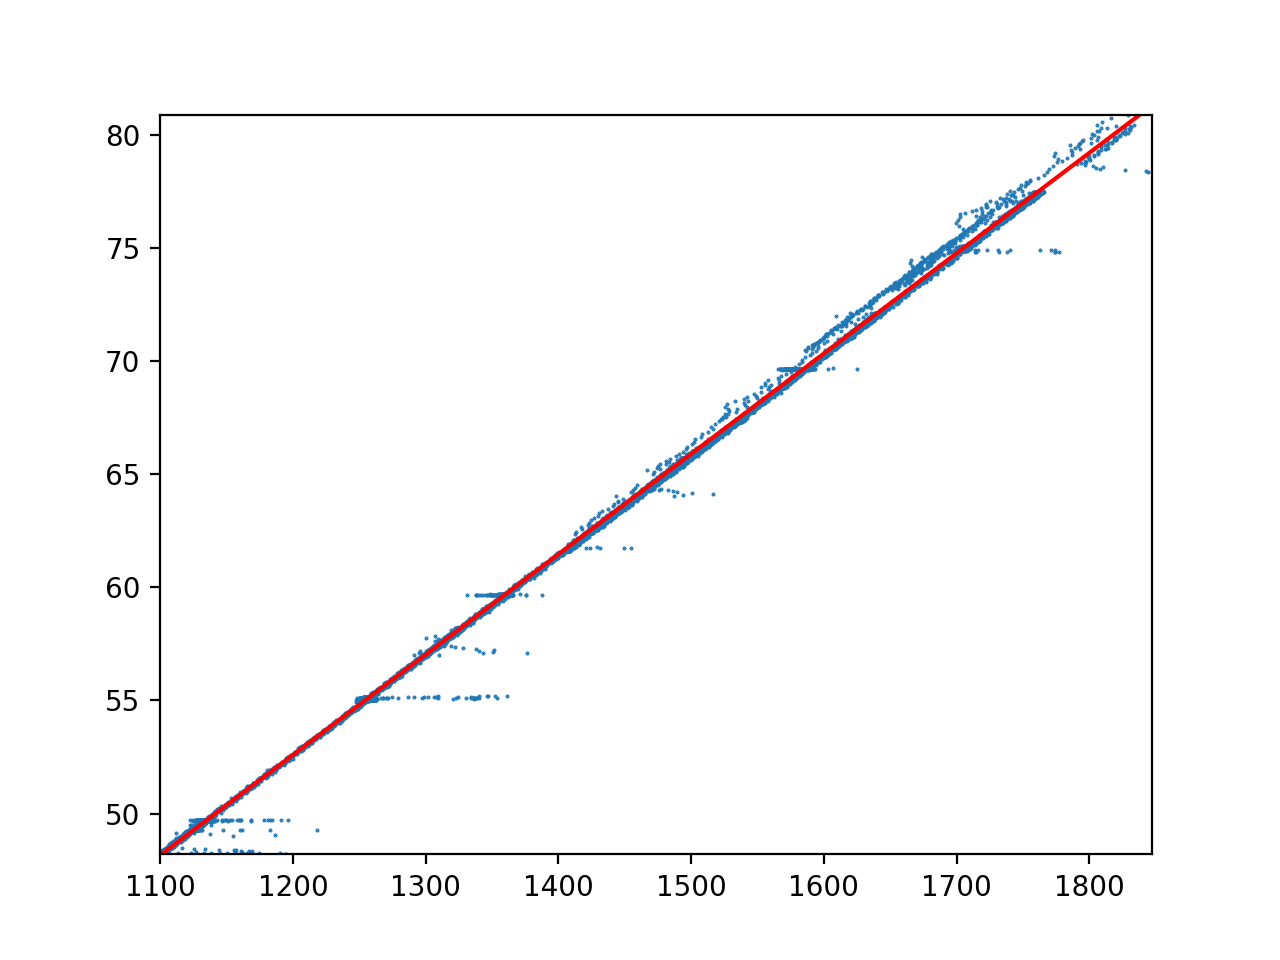

In [13]:
for gear, ols in enumerate(rpm_vs_spd_models):
    
    _, ax = plt.subplots()
    
    X = np.arange(0, 6000, 0.1)
    Y = ols.predict(X.reshape(-1, 1))
    
    ax.plot(X, Y, color='red')
    
    df_gear = df[(df['Trans_shift_inprogress_CAN[]'] == 0.0)
                 & (df['Eng_throttle_position_PCM[per]'] > idle_throttle_level)
                 & (df['Trans_gear_engaged_CAN[]'] == gear + 1)]
    
    ax.scatter(df_gear['Eng_speed_PCM[rpm]'],
               df_gear['Dyno_Spd[mph]'], s=0.2)
    
    ax.set_xlim(df_gear['Eng_speed_PCM[rpm]'].min(), df_gear['Eng_speed_PCM[rpm]'].max())
    ax.set_ylim(df_gear['Dyno_Spd[mph]'].min(), df_gear['Dyno_Spd[mph]'].max())

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


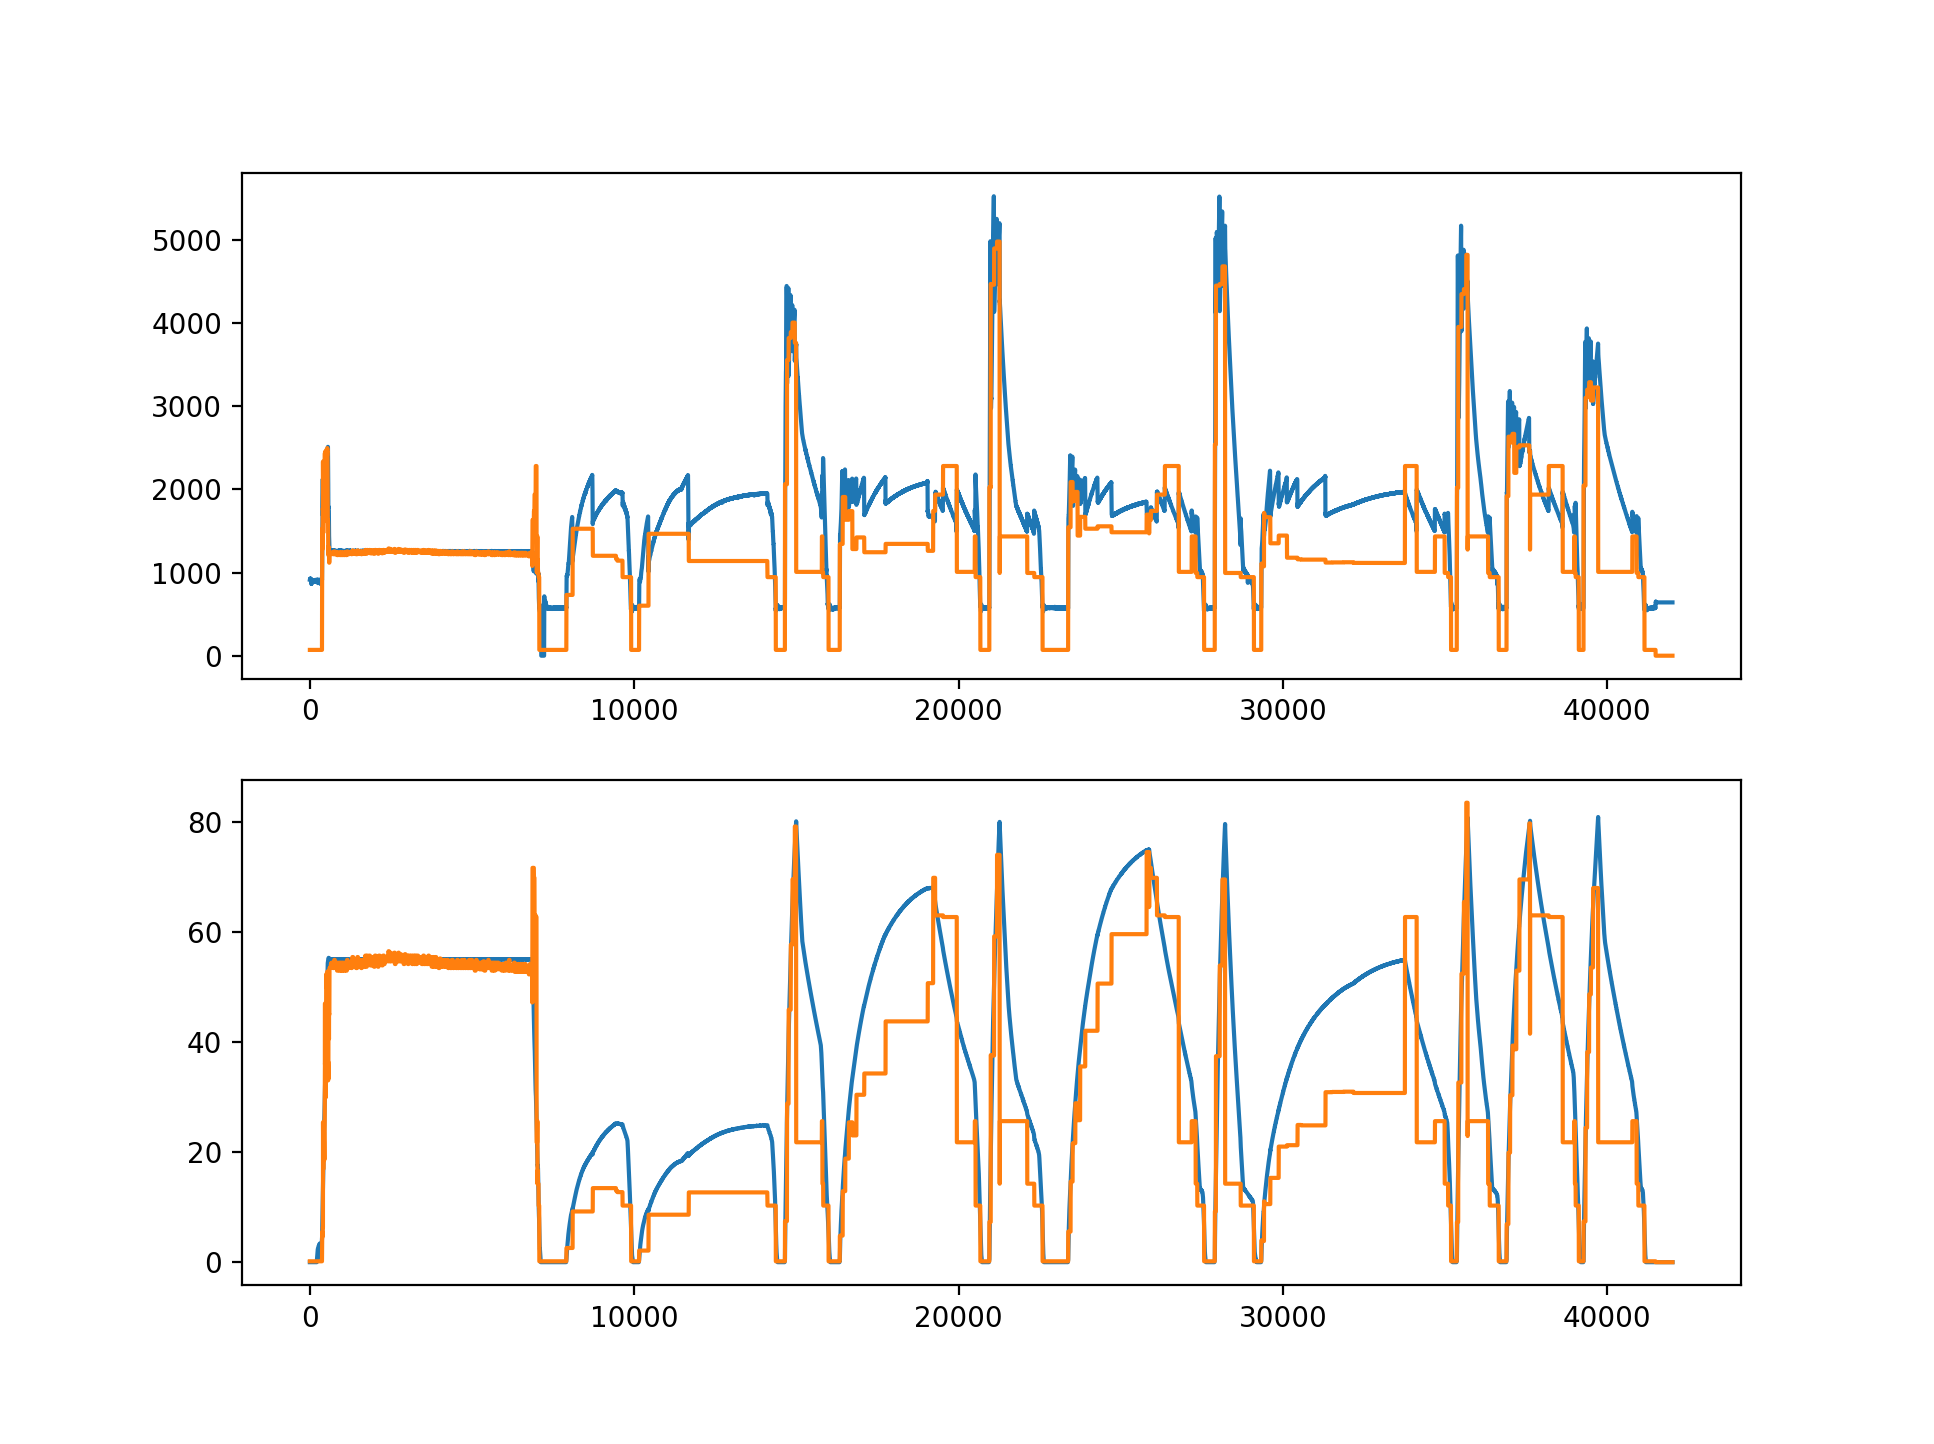

In [14]:
_, (ax1, ax2) = plt.subplots(2)

X = dfs[3][['Trans_gear_engaged_CAN[]', 
            'Pedal_accel_pos_CAN[per]']].values
Y = dfs[3][['Eng_speed_PCM[rpm]', 'Dyno_Spd[mph]']].values

Y_pred = np.zeros(Y.shape)

for time in range(X.shape[0]):
    
    if int(X[time, 0]) < 1 or int(X[time, 0]) > 11:
        continue
    
    X_poly = poly_transforms[int(X[time, 0]) - 1].transform(X[time, 1].reshape(-1, 1))
    Y_pred[time, 0] = ped_vs_rpm_models[int(X[time, 0]) - 1].predict(X_poly)    
    Y_pred[time, 1] = rpm_vs_spd_models[int(X[time, 0]) - 1].predict(Y_pred[time, 0].reshape(-1, 1))

ax1.plot(range(Y.shape[0]), Y[:, 0])
ax1.plot(range(Y.shape[0]), Y_pred[:, 0])

ax2.plot(range(Y.shape[0]), Y[:, 1])
ax2.plot(range(Y.shape[0]), Y_pred[:, 1])